Ingresa los equipos separados por coma (por ejemplo, Boca Juniors, River Plate): Arsenal Sarandi, Union de Santa Fe


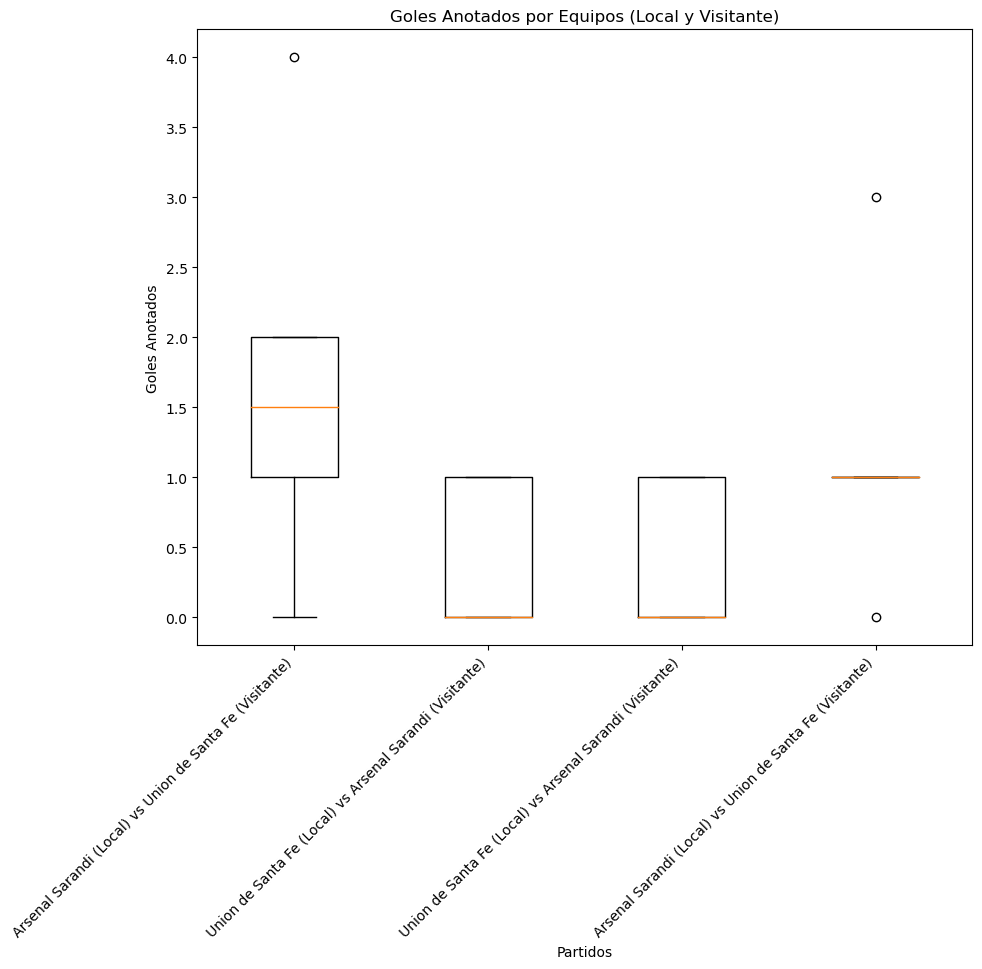

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
df = pd.read_csv('https://www.football-data.co.uk/new/ARG.csv')

# Pedir al usuario que seleccione los equipos
selected_teams = input("Ingresa los equipos separados por coma (por ejemplo, Boca Juniors, River Plate): ").split(", ")

# Filtrar los partidos para los equipos seleccionados
selected_matches = df[(df['Home'].isin(selected_teams) & df['Away'].isin(selected_teams))]

# Crear una lista de etiquetas para el gráfico
labels = []
data = []

for team1 in selected_teams:
    for team2 in selected_teams:
        if team1 != team2:
            home_label = f'{team1} (Local) vs {team2} (Visitante)'
            away_label = f'{team2} (Local) vs {team1} (Visitante)'
            home_data = selected_matches[(selected_matches['Home'] == team1) & (selected_matches['Away'] == team2)]['HG']
            away_data = selected_matches[(selected_matches['Home'] == team2) & (selected_matches['Away'] == team1)]['AG']

            if not home_data.empty and not away_data.empty:
                labels.append(home_label)
                labels.append(away_label)
                data.append(home_data)
                data.append(away_data)

# Crear el gráfico de boxplot
plt.figure(figsize=(10, 8))
plt.boxplot(data, labels=labels)

plt.title('Goles Anotados por Equipos (Local y Visitante)')
plt.xlabel('Partidos')
plt.ylabel('Goles Anotados')

plt.xticks(rotation=45, ha="right")

# Mostrar el gráfico
plt.show()